In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/ann/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('STATA.csv')
data.head()

,Hamlet,Household_ID,Container_ID,Container_position,Water_level,Lid,Fish,Meso,Micronecta,Source,Treatment,Larvae,count_larvae,Full count_pupae
0,0,1,1,0,25,1,0,0,0,0,0,1,206.7,51.6
1,0,2,2,1,25,1,0,0,0,1,2,0,0.0,3.0
2,0,2,5,0,25,0,0,0,0,1,2,0,0.0,0.0
3,0,2,6,0,25,1,0,0,0,0,1,0,0.0,0.0
4,0,3,5,1,30,1,0,0,0,0,1,0,0.0,0.0


In [4]:
data.corr()

,Hamlet,Household_ID,Container_ID,Container_position,Water_level,Lid,Fish,Meso,Micronecta,Source,Treatment,Larvae,count_larvae,Full count_pupae
Hamlet,1.000000,0.994492,0.094205,-0.062234,-0.118714,0.117249,0.001761,0.046505,-0.067171,0.003541,-0.047978,-0.178580,-0.013903,0.008005
Household_ID,0.994492,1.000000,0.097653,-0.047011,-0.108397,0.114254,-0.009487,0.054065,-0.062882,0.009739,-0.045711,-0.179464,-0.014501,0.004756
Container_ID,0.094205,0.097653,1.000000,-0.155956,0.160253,0.311396,0.061851,-0.142878,-0.006416,0.079765,0.014880,0.163056,0.064839,0.141159
Container_position,-0.062234,-0.047011,-0.155956,1.000000,0.164580,0.167526,0.083333,0.085881,-0.074729,0.005043,-0.072193,-0.105975,0.006019,0.015534
Water_level,-0.118714,-0.108397,0.160253,0.164580,1.000000,0.140976,0.032449,-0.094824,-0.055055,0.096440,-0.100137,0.019045,-0.032967,-0.026851
Lid,0.117249,0.114254,0.311396,0.167526,0.140976,1.000000,0.177764,0.013257,0.066434,-0.080751,-0.049458,0.081714,0.084776,0.105238
Fish,0.001761,-0.009487,0.061851,0.083333,0.032449,0.177764,1.000000,-0.105307,-0.032106,0.001345,-0.017750,-0.038622,-0.019359,-0.015380
Meso,0.046505,0.054065,-0.142878,0.085881,-0.094824,0.013257,-0.105307,1.000000,0.086366,-0.159781,-0.144467,-0.048003,0.004920,-0.013838
Micronecta,-0.067171,-0.062882,-0.006416,-0.074729,-0.055055,0.066434,-0.032106,0.086366,1.000000,-0.038571,0.035446,0.025962,-0.020748,-0.009689
Source,0.003541,0.009739,0.079765,0.005043,0.096440,-0.080751,0.001345,-0.159781,-0.038571,1.000000,0.510843,-0.047048,0.010253,0.092821


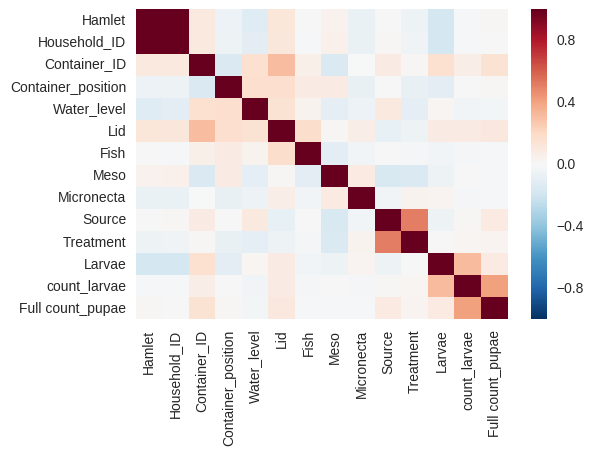

In [5]:
sns.heatmap(data.corr())

In [7]:
lm = smf.ols(formula='count_larvae ~ Hamlet + Lid + Water_level + Meso + Source +Container_ID', data=data).fit()
print lm.pvalues

Intercept       0.674549
Hamlet          0.409742
Lid             0.071583
Water_level     0.188858
Meso            0.808582
Source          0.643593
Container_ID    0.261193
dtype: float64
